In [57]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### 2D DFT

The 2D DFT is defined as:

$$Z_{l,k} = \frac{1}{MN}\sum_{n = 0}^{N - 1}\sum_{m = 0}^{M - 1}x_{n,m} e^{-2\pi i (km/M + ln/N)}$$

---

The 2D DFT is separable, thus:
$$y_{n,k} = \frac{1}{M}\sum_{m = 0}^{M - 1}x_{:,m} e^{-2\pi i (km/M)}$$
$$Z_{l,k} = \frac{1}{N}\sum_{n = 0}^{N - 1}y_{n,:}e^{-2\pi i (ln/N)}$$


In [109]:
def DFT_2d(x):
    """
    Compute the discrete Fourier Transform of the 2D matrix x
        x - input 2D signal: shape [N, M]
    """
    N, M = x.shape
    n = np.arange(N)
    m = np.arange(M)
    l = n.reshape((N, 1))
    k = m.reshape((M, 1))
    z = np.zeros([N, M], dtype=np.complex64) # to store the result
    # Because DFT is separable, we can do first do it row-wise, then column-wise
    e = np.exp(-2j * np.pi * k * m / M)
    for i in range(N):
        z[i, :] = np.dot(e, x[i]) # equivalent to DFT_1d(x[i, :])
    e = np.exp(-2j * np.pi * l * n / N)
    for j in range(M):
        z[:, j] = np.dot(e, z[:, j]) # equivalent to DFT_1d(z[:, j])
    return z/(M*N)

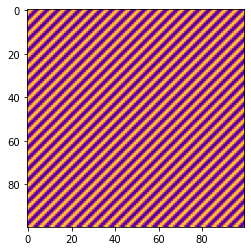

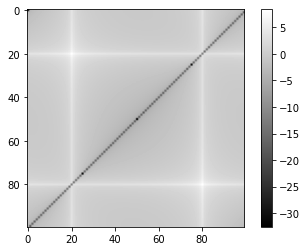

In [122]:
# Make the X, Y meshgrid instead of np.tile
xs = np.linspace(-20*np.pi, 20*np.pi, 100)
ys = np.linspace(-20*np.pi, 20*np.pi, 100)
tau, phi = np.meshgrid(xs, ys) 
# Z evaluation
amp = np.sin(tau+phi) 
plt.imshow(amp, cmap='plasma')
plt.show()

x_dft = DFT_2d(amp)
plt.imshow(np.log(np.abs(x_dft)), cmap='gray')
plt.colorbar()
plt.show()

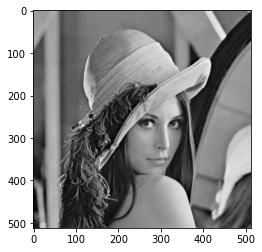

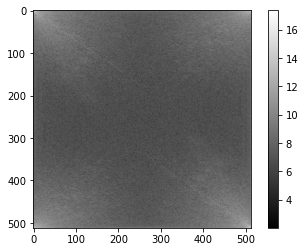

In [116]:
img = cv2.imread('Lenna_(test_image).png', 0)
plt.imshow(img, cmap='gray')
plt.show()

x_dft = DFT_2d(img)
plt.imshow(np.log(np.abs(x_dft)), cmap='gray')
plt.colorbar()
plt.show()